<a href="https://colab.research.google.com/github/meghcodes/claims_analysis/blob/main/claims_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()



Saving claims_data.csv to claims_data (1).csv


In [4]:
import pandas as pd

df = pd.read_csv('claims_data.csv')
df.head()

,Claim_ID,Patient_ID,Claim_Status,Insurance_Type,Diagnosis_Code,Procedure_Code,Billing_Amount,Rejection_Reason
0,C1000,P2000,APPROVED,Private,D001,P001,457.12,NaN
1,C1001,P2001,APPROVED,Medicaid,D001,P002,3567.64,NaN
2,C1002,P2002,APPROVED,Medicare,D004,P001,2674.44,Invalid Procedure Code
3,C1003,P2003,APPROVED,Medicaid,D004,P002,4789.24,NaN
4,C1004,P2004,REJECTED,Medicaid,D002,P004,2650.97,NaN


In [5]:
import pandas as pd

df = pd.read_csv('claims_data.csv')
df.head()


,Claim_ID,Patient_ID,Claim_Status,Insurance_Type,Diagnosis_Code,Procedure_Code,Billing_Amount,Rejection_Reason
0,C1000,P2000,APPROVED,Private,D001,P001,457.12,NaN
1,C1001,P2001,APPROVED,Medicaid,D001,P002,3567.64,NaN
2,C1002,P2002,APPROVED,Medicare,D004,P001,2674.44,Invalid Procedure Code
3,C1003,P2003,APPROVED,Medicaid,D004,P002,4789.24,NaN
4,C1004,P2004,REJECTED,Medicaid,D002,P004,2650.97,NaN


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Encode categorical variables
df_encoded = pd.get_dummies(df[['Insurance_Type', 'Diagnosis_Code', 'Procedure_Code']])
df_encoded['Billing_Amount'] = df['Billing_Amount']

# Add target variable
df_encoded['Target'] = df['Claim_Status'].map({'APPROVED': 0, 'REJECTED': 1})

# Split features and target
X = df_encoded.drop('Target', axis=1)
y = df_encoded['Target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [9]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.65      0.92      0.76       195
           1       0.33      0.08      0.12       105

    accuracy                           0.62       300
   macro avg       0.49      0.50      0.44       300
weighted avg       0.54      0.62      0.54       300



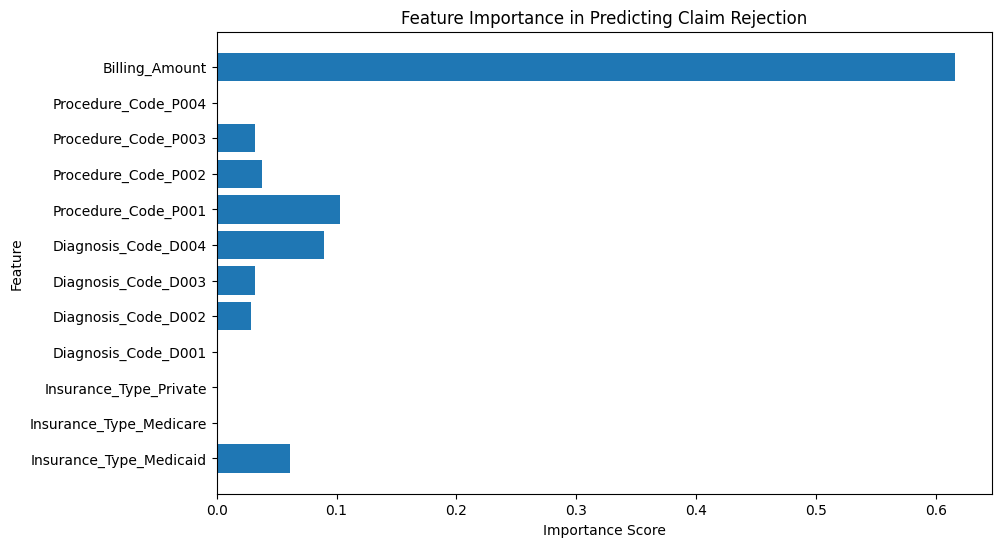

In [10]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.title('Feature Importance in Predicting Claim Rejection')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
